In [1]:
import pandas as pd # use pandas as pd

#
# Loading our datasets from txt file into pandas dataframes.
#

# pd.set_option('display.max_columns', 50)

RentalMaster = pd.read_csv('RentalMaster.txt', delimiter = "\t") 
UnitMaster = pd.read_csv('UnitMaster.txt', delimiter = "\t")
UnitRentMaster = pd.read_csv('UnitRentMaster.txt', delimiter = "\t")

In [2]:
RentalMaster 

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate
0,12435,3435,10201,2/11/2013,2/11/2015
1,12436,3436,10301,10/9/2012,10/10/2015
2,12437,3437,10501,1/2/2014,1/2/2015
3,12438,3438,10601,5/9/2013,5/10/2015
4,12439,3439,10701,2/12/2014,2/12/2015
...,...,...,...,...,...
7231,19666,14937,70804,3/1/2021,NaN
7232,19667,14938,70210,3/1/2021,NaN
7233,19668,14942,80303,3/1/2021,NaN
7234,19669,14948,70102,3/1/2021,NaN


In [3]:
UnitMaster

,UnitNumber,UnitType,UnitPlan,Sqft,Floor
0,10101,STD,STD-S&A,450,1
1,10201,STD,STD-S&A,450,2
2,10301,STD,STD-S&A,450,3
3,10401,STD,STD-S&A,450,4
4,10501,STD,STD-S&A,450,5
...,...,...,...,...,...
1095,100611,2BR,2BR-S,1250,6
1096,100711,2BR,2BR-S,1250,7
1097,100811,2BR,2BR-S,1250,8
1098,100911,2BR,2BR-S,1250,9


In [4]:
#
# For some reason UnitRentMaster dataframe includes some excess columns. 
# We drop excess columns in UnitRentMaster dataframe.
#

UnitRentMaster = UnitRentMaster.drop(columns=["Unnamed: 4", "Unnamed: 5","Unnamed: 6", 
                                              "Unnamed: 7","Unnamed: 8", "Unnamed: 9", 
                                              "Unnamed: 10", "Unnamed: 11","Unnamed: 12"])

In [5]:
UnitRentMaster

,UnitPlan,StartDate,EndDate,RentRate
0,STD-S&A,12/1/2014,12/31/2014,1438
1,STD-S&B,12/1/2014,12/31/2014,1438
2,STD-S&C,12/1/2014,12/31/2014,1438
3,STD-M&A,12/1/2014,12/31/2014,1770
4,STD-M&B,12/1/2014,12/31/2014,1770
...,...,...,...,...
831,1BR-S&A,3/1/2021,3/31/2021,1933
832,1BR-S&B,3/1/2021,3/31/2021,1933
833,1BR-L&A,3/1/2021,3/31/2021,2129
834,1BR-L&B,3/1/2021,3/31/2021,2129


In [6]:
#
# He we merge RentalMaster and UnitMaster dataframes based on their common columns "UnitNumber".
# So, we can display each lease's unit information on a single dataframe.
# To do this a new dataframe named Rental_Unit_Master is created to store our new merged dataframes.
#

Rental_Unit_Master = pd.merge(RentalMaster, UnitMaster, how='inner', on='UnitNumber')

In [7]:
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor
0,12435,3435,10201,2/11/2013,2/11/2015,STD,STD-S&A,450,2
1,13573,3435,10201,2/12/2015,2/13/2016,STD,STD-S&A,450,2
2,14688,6456,10201,3/1/2016,3/1/2017,STD,STD-S&A,450,2
3,15776,8282,10201,4/1/2017,4/1/2018,STD,STD-S&A,450,2
4,16736,8282,10201,4/2/2018,4/3/2019,STD,STD-S&A,450,2
...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,5/1/2020,NaN,1BR,1BR-S&B,750,10
7232,15080,7189,100208,7/1/2016,7/1/2017,1BR,1BR-S&B,750,2
7233,16603,9724,100208,2/1/2018,2/1/2019,1BR,1BR-S&B,750,2
7234,17690,11563,100208,3/2/2019,3/1/2020,1BR,1BR-S&B,750,2


In [8]:
#
# Converting Start and End dates from string to pandas date time object in order to do calculations on them.
#

Rental_Unit_Master.StartDate = pd.to_datetime(pd.Series(Rental_Unit_Master.StartDate))
Rental_Unit_Master.EndDate = pd.to_datetime(pd.Series(Rental_Unit_Master.EndDate))

UnitRentMaster.StartDate = pd.to_datetime(pd.Series(UnitRentMaster.StartDate))
UnitRentMaster.EndDate = pd.to_datetime(pd.Series(UnitRentMaster.EndDate))

In [9]:
import numpy as np # use numpy as np

#
# Adding a new column named Total Occupancy based on Start and End dates of lease in order to keep total 
# occupency period of each lease. We may use this information later in classification part.
#

Rental_Unit_Master['Total Occupancy'] = ((Rental_Unit_Master['EndDate'] - 
                                         Rental_Unit_Master['StartDate'])/np.timedelta64(1, 'M')).round(1)

In [10]:
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0
...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0


In [11]:
#
# Created a copy of our dataframe so we can do seperate calculations each of them.
#

dfcopy = Rental_Unit_Master.copy() 

In [12]:
#
# Combining UnitPlan and StartDate(only with its months and years) informations on both 
# Rental_Unit_Master and  UnitRentMaster dataframes. 
# Creating new columns to store combined information in order to merge them.
#

Rental_Unit_Master['StartMonthYear'] = (Rental_Unit_Master['UnitPlan'] + 
                                        Rental_Unit_Master['StartDate'].apply(lambda x: x.strftime('%m-%Y')))

UnitRentMaster['StartMonthYear'] = (UnitRentMaster['UnitPlan'] + 
                                        UnitRentMaster['StartDate'].apply(lambda x: x.strftime('%m-%Y')))

In [13]:
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018
...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019


In [14]:
UnitRentMaster

,UnitPlan,StartDate,EndDate,RentRate,StartMonthYear
0,STD-S&A,2014-12-01,2014-12-31,1438,STD-S&A12-2014
1,STD-S&B,2014-12-01,2014-12-31,1438,STD-S&B12-2014
2,STD-S&C,2014-12-01,2014-12-31,1438,STD-S&C12-2014
3,STD-M&A,2014-12-01,2014-12-31,1770,STD-M&A12-2014
4,STD-M&B,2014-12-01,2014-12-31,1770,STD-M&B12-2014
...,...,...,...,...,...
831,1BR-S&A,2021-03-01,2021-03-31,1933,1BR-S&A03-2021
832,1BR-S&B,2021-03-01,2021-03-31,1933,1BR-S&B03-2021
833,1BR-L&A,2021-03-01,2021-03-31,2129,1BR-L&A03-2021
834,1BR-L&B,2021-03-01,2021-03-31,2129,1BR-L&B03-2021


In [15]:
#
# Merging Rental_Unit_Master and UnitRentMaster dataframes based on their common columns "StartMonthYear".
# So, we can display each lease's rent rates on Rental_Unit_Master dataframe.
#
Rental_Unit_Master = pd.merge(Rental_Unit_Master, UnitRentMaster, 
                              how='left', on='StartMonthYear') # add " how='left' " to not to drop duplicates

In [16]:
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate_x,EndDate_x,UnitType,UnitPlan_x,Sqft,Floor,Total Occupancy,StartMonthYear,UnitPlan_y,StartDate_y,EndDate_y,RentRate
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,NaT,NaT,NaN
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,STD-S&A,2015-02-01,2015-03-01,1500.0
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,STD-S&A,2016-03-01,2016-03-31,1395.0
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,STD-S&A,2017-04-01,2017-04-30,1439.0
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,STD-S&A,2018-04-01,2018-04-30,1453.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,1BR-S&B,2020-05-01,2020-05-31,2124.0
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1BR-S&B,2016-07-01,2016-07-31,1979.0
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1BR-S&B,2018-02-01,2018-02-28,1923.0
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1BR-S&B,2019-03-02,2019-04-01,1923.0


In [17]:
# 
# Dropping duplicate columns in Rental_Unit_Master dataframe.
#

Rental_Unit_Master = Rental_Unit_Master.drop(columns=["UnitPlan_y", "StartDate_y","EndDate_y"])


In [18]:
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate_x,EndDate_x,UnitType,UnitPlan_x,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0


In [19]:
#
# Renaming column names with '_x' suffix.
#

Rental_Unit_Master = Rental_Unit_Master.rename(columns={'StartDate_x': 'StartDate',
                                                        'EndDate_x': 'EndDate',
                                                       'UnitPlan_x': 'UnitPlan'})

Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0


In [20]:
#
# Finds Rent rates on each UnitPlan's EndDate and calculating Rent increment rates as we may use these 
# information when we deploy our churn model. 
# We will follow the same steps as we followed when we fetch Rent rates.
#
# "if pd.notnull(x) else '' " must be added as some EndDates are missing.
#

Rental_Unit_Master['EndMonthYear'] = (Rental_Unit_Master['UnitPlan'] + 
                                        Rental_Unit_Master['EndDate'].apply(lambda x: x.strftime('%m-%Y') 
                                                                            if pd.notnull(x) else ''))

UnitRentMaster['EndMonthYear'] = (UnitRentMaster['UnitPlan'] + 
                                        UnitRentMaster['StartDate'].apply(lambda x: x.strftime('%m-%Y') 
                                                                        if pd.notnull(x) else ''))


Rental_Unit_Master = pd.merge(Rental_Unit_Master, UnitRentMaster, how='left', 
                              on='EndMonthYear')


Rental_Unit_Master = Rental_Unit_Master.drop(columns=["UnitPlan_y", "StartDate_y","EndDate_y", 
                                                      "StartMonthYear_y"])

Rental_Unit_Master = Rental_Unit_Master.rename(columns={'StartDate_x': 'StartDate',
                                                       'EndDate_x': 'EndDate',
                                                       'UnitPlan_x': 'UnitPlan',
                                                       'RentRate_x': 'RentRate',
                                                       'StartMonthYear_x': 'StartMonthYear',
                                                       'RentRate_y': 'EndRentRate'})

Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate,EndMonthYear,EndRentRate
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,STD-S&A02-2015,1500.0
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0,STD-S&A02-2016,1396.0
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0,STD-S&A03-2017,1420.0
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0,STD-S&A04-2018,1453.0
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0,STD-S&A04-2019,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0,1BR-S&B,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0,1BR-S&B07-2017,1974.0
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0,1BR-S&B02-2019,1937.0
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0,1BR-S&B03-2020,2071.0


In [21]:
#
# Calculating percentage change in rent of the same UnitPlan when a customer move-in and move-out.
# Rent increment may cause churn and we may use this information in our churn model.
#

Rental_Unit_Master['%ChangeInRent'] = 100 * (Rental_Unit_Master['EndRentRate'] - 
                                        Rental_Unit_Master['RentRate']) / Rental_Unit_Master['RentRate']

Rental_Unit_Master


,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate,EndMonthYear,EndRentRate,%ChangeInRent
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,STD-S&A02-2015,1500.0,NaN
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0,STD-S&A02-2016,1396.0,-6.933333
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0,STD-S&A03-2017,1420.0,1.792115
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0,STD-S&A04-2018,1453.0,0.972898
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0,STD-S&A04-2019,1500.0,3.234687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0,1BR-S&B,NaN,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0,1BR-S&B07-2017,1974.0,-0.252653
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0,1BR-S&B02-2019,1937.0,0.728029
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0,1BR-S&B03-2020,2071.0,7.696308


In [22]:
#
#
# CALCULATING CHURN.
#
#

In [23]:
#
# Created a dictionary stores customer numbers and count of lease they have.
#

customerDictionary = { }
list = []

for i in range(len(Rental_Unit_Master["CustomerNo"])):
    customerDictionary[Rental_Unit_Master["CustomerNo"][i]] = [
        Rental_Unit_Master["CustomerNo"].value_counts()[Rental_Unit_Master["CustomerNo"][i]]
    ]
customerDictionary #YAVASLAMASIN DIYE


{3435: [2],
 6456: [1],
 8282: [2],
 11788: [1],
 13617: [1],
 3436: [2],
 7675: [1],
 9465: [1],
 11253: [1],
 13130: [1],
 14829: [1],
 3437: [3],
 8033: [2],
 11548: [1],
 13326: [1],
 3438: [1],
 5261: [1],
 7066: [1],
 8994: [1],
 10777: [2],
 14249: [1],
 3439: [4],
 9813: [1],
 11632: [1],
 13463: [1],
 3440: [3],
 8761: [2],
 12257: [2],
 3441: [1],
 5888: [3],
 11024: [1],
 12824: [2],
 3442: [1],
 5567: [4],
 12419: [2],
 3443: [2],
 6630: [1],
 8517: [1],
 10286: [1],
 12112: [2],
 3444: [1],
 5909: [2],
 9355: [2],
 12826: [1],
 14615: [1],
 3445: [4],
 10297: [2],
 13827: [1],
 3446: [1],
 6040: [1],
 7819: [2],
 11305: [2],
 14799: [1],
 3447: [1],
 4578: [5],
 13147: [2],
 3448: [1],
 5074: [1],
 6922: [2],
 10426: [1],
 12273: [2],
 3449: [1],
 5103: [3],
 10324: [3],
 3450: [3],
 9271: [3],
 14488: [1],
 3451: [2],
 7445: [4],
 14288: [1],
 3452: [3],
 8622: [1],
 10453: [1],
 12401: [2],
 3453: [4],
 10954: [1],
 12725: [2],
 3454: [5],
 12786: [2],
 3455: [1],
 6046:

In [24]:
#
# Each leases's start and end dates are assigned to customers in our dictionary.
#

for i in [*customerDictionary.keys()]:
    for j in range(customerDictionary.get(i)[0]):
        customerDictionary[i].append([Rental_Unit_Master.loc[Rental_Unit_Master['CustomerNo'] == 
                                                             i, 'LeaseNo'].iloc[j],
                                    Rental_Unit_Master.loc[Rental_Unit_Master['CustomerNo'] == 
                                                           i, 'StartDate'].iloc[j],
                                    Rental_Unit_Master.loc[Rental_Unit_Master['CustomerNo'] == 
                                                           i, 'EndDate'].iloc[j]])
customerDictionary #YAVASLAMASIN DIYE


{3435: [2,
  [12435, Timestamp('2013-02-11 00:00:00'), Timestamp('2015-02-11 00:00:00')],
  [13573, Timestamp('2015-02-12 00:00:00'), Timestamp('2016-02-13 00:00:00')]],
 6456: [1,
  [14688, Timestamp('2016-03-01 00:00:00'), Timestamp('2017-03-01 00:00:00')]],
 8282: [2,
  [15776, Timestamp('2017-04-01 00:00:00'), Timestamp('2018-04-01 00:00:00')],
  [16736, Timestamp('2018-04-02 00:00:00'), Timestamp('2019-04-03 00:00:00')]],
 11788: [1,
  [17835, Timestamp('2019-05-02 00:00:00'), Timestamp('2020-05-01 00:00:00')]],
 13617: [1, [18937, Timestamp('2020-06-01 00:00:00'), NaT]],
 3436: [2,
  [12436, Timestamp('2012-10-09 00:00:00'), Timestamp('2015-10-10 00:00:00')],
  [14280, Timestamp('2015-10-11 00:00:00'), Timestamp('2016-10-10 00:00:00')]],
 7675: [1,
  [15403, Timestamp('2016-11-01 00:00:00'), Timestamp('2017-11-01 00:00:00')]],
 9465: [1,
  [16458, Timestamp('2017-12-01 00:00:00'), Timestamp('2018-12-01 00:00:00')]],
 11253: [1,
  [17507, Timestamp('2019-01-01 00:00:00'), Timestam

In [25]:
#
# We found if customer churned after the end of his/her lease or not.
# If a customer rent the house after 4/1/2020 I put NaN value to his/her churn column as end dates of leases
# are missing after that date so we cannot know if he or she will churn or not.
#
# If a customer rented a house before 4/1/2020 then I looked at first lease's end date and next lease's start
# date. If these dates are equal then we assume that customer did not churn as he or she signed another lease.
# And if customer has only one lease then we assume he or she churned after lease ends.
#

from datetime import timedelta

Rental_Unit_Master = Rental_Unit_Master.assign(Churn="")

for i in range(len([*customerDictionary.keys()])):
    for j in range(1,[*customerDictionary.values()][i][0]+1):
        if (j == [*customerDictionary.values()][i][0]): 
            if [*customerDictionary.values()][i][j][1] < pd.to_datetime("4/1/2020"): 
                Rental_Unit_Master.loc[Rental_Unit_Master['LeaseNo'] == 
                                       [*customerDictionary.values()][i][j][0], 'Churn'] = "YES"
            else:
                Rental_Unit_Master.loc[Rental_Unit_Master['LeaseNo'] == 
                                       [*customerDictionary.values()][i][j][0], 'Churn'] = np.nan
        else: 
            if ([*customerDictionary.values()][i][j][2] + timedelta(days=1) == 
                [*customerDictionary.values()][i][j+1][1]): 
                    Rental_Unit_Master.loc[Rental_Unit_Master['LeaseNo'] == 
                                           [*customerDictionary.values()][i][j][0], 'Churn'] = "NO"
            else: 
                Rental_Unit_Master.loc[Rental_Unit_Master['LeaseNo'] == 
                                       [*customerDictionary.values()][i][j][0], 'Churn'] = "YES"

                
                
Rental_Unit_Master


,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate,EndMonthYear,EndRentRate,%ChangeInRent,Churn
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,STD-S&A02-2015,1500.0,NaN,NO
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0,STD-S&A02-2016,1396.0,-6.933333,YES
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0,STD-S&A03-2017,1420.0,1.792115,YES
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0,STD-S&A04-2018,1453.0,0.972898,NO
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0,STD-S&A04-2019,1500.0,3.234687,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0,1BR-S&B,NaN,NaN,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0,1BR-S&B07-2017,1974.0,-0.252653,YES
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0,1BR-S&B02-2019,1937.0,0.728029,YES
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0,1BR-S&B03-2020,2071.0,7.696308,YES


In [26]:
dfcopy2 = Rental_Unit_Master.copy() # copy dataset for seaborn at the end.

In [27]:
#
#
# CALCULATING RENEWALS, MOVE INS AND MOVE OUTS.
#
#

In [28]:
#
# Create three new empty colums to store MoveIn, MoveOut and Renewal informations.
#

Rental_Unit_Master = Rental_Unit_Master.assign(MoveIn=np.nan)
Rental_Unit_Master = Rental_Unit_Master.assign(MoveOut=np.nan)
Rental_Unit_Master = Rental_Unit_Master.assign(Renewal=np.nan)
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate,EndMonthYear,EndRentRate,%ChangeInRent,Churn,MoveIn,MoveOut,Renewal
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,STD-S&A02-2015,1500.0,NaN,NO,NaN,NaN,NaN
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0,STD-S&A02-2016,1396.0,-6.933333,YES,NaN,NaN,NaN
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0,STD-S&A03-2017,1420.0,1.792115,YES,NaN,NaN,NaN
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0,STD-S&A04-2018,1453.0,0.972898,NO,NaN,NaN,NaN
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0,STD-S&A04-2019,1500.0,3.234687,YES,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0,1BR-S&B,NaN,NaN,NaN,NaN,NaN,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0,1BR-S&B07-2017,1974.0,-0.252653,YES,NaN,NaN,NaN
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0,1BR-S&B02-2019,1937.0,0.728029,YES,NaN,NaN,NaN
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0,1BR-S&B03-2020,2071.0,7.696308,YES,NaN,NaN,NaN


In [29]:
#
# If the house is customer's first house then I put it's lease's start date to MoveIn column.
# If it isn't customer's first house then I put customer's last lease's end date to MoveOut column.
# if the end date of lease is NaN I out only the start date to MoveIn column.
# For renewal, I assumed if customer did not churn then customer renew the lease on his or her end date or 
# vice versa.
#

for i in range(len([*customerDictionary.keys()])):
    
    Rental_Unit_Master.loc[Rental_Unit_Master['LeaseNo'] == 
                            [*customerDictionary.values()][i][1][0], 'MoveIn'] = [*customerDictionary.values()][i][1][1].month_name() + " " + str([*customerDictionary.values()][i][1][1].year)

    Rental_Unit_Master.loc[Rental_Unit_Master['LeaseNo'] == 
                           [*customerDictionary.values()][i][-1][0], 'MoveOut'] = str([*customerDictionary.values()][i][-1][-1].month_name()) + " " + str([*customerDictionary.values()][i][-1][-1].year)

    
Rental_Unit_Master.loc[Rental_Unit_Master['Churn'] == 'NO', 'Renewal'] = Rental_Unit_Master['EndDate'].apply(lambda x: x.strftime('%B %Y') if pd.notnull(x) else '')

Rental_Unit_Master = Rental_Unit_Master.replace('nan nan', np.nan)    
Rental_Unit_Master


,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate,EndMonthYear,EndRentRate,%ChangeInRent,Churn,MoveIn,MoveOut,Renewal
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,STD-S&A02-2015,1500.0,NaN,NO,February 2013,NaN,February 2015
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0,STD-S&A02-2016,1396.0,-6.933333,YES,NaN,February 2016,NaN
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0,STD-S&A03-2017,1420.0,1.792115,YES,March 2016,March 2017,NaN
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0,STD-S&A04-2018,1453.0,0.972898,NO,April 2017,NaN,April 2018
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0,STD-S&A04-2019,1500.0,3.234687,YES,NaN,April 2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0,1BR-S&B,NaN,NaN,NaN,May 2020,NaN,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0,1BR-S&B07-2017,1974.0,-0.252653,YES,July 2016,July 2017,NaN
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0,1BR-S&B02-2019,1937.0,0.728029,YES,February 2018,February 2019,NaN
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0,1BR-S&B03-2020,2071.0,7.696308,YES,March 2019,March 2020,NaN


In [30]:
#
# Convert Renewal, MoveIn and MoveOut columns to pandas datetime object.
#

Rental_Unit_Master.Renewal = pd.to_datetime(pd.Series(Rental_Unit_Master.Renewal))
Rental_Unit_Master.MoveIn = pd.to_datetime(pd.Series(Rental_Unit_Master.MoveIn))
Rental_Unit_Master.MoveOut = pd.to_datetime(pd.Series(Rental_Unit_Master.MoveOut))

In [31]:
#
# Only keeps month and year information as days are not important.
#

Rental_Unit_Master['Renewal'] = Rental_Unit_Master['Renewal'].apply(lambda x: x.strftime('%B-%Y') if pd.notnull(x) else np.nan)
Rental_Unit_Master['MoveIn'] = Rental_Unit_Master['MoveIn'].apply(lambda x: x.strftime('%B-%Y') if pd.notnull(x) else np.nan)
Rental_Unit_Master['MoveOut'] = Rental_Unit_Master['MoveOut'].apply(lambda x: x.strftime('%B-%Y') if pd.notnull(x) else np.nan)

In [32]:
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate,EndMonthYear,EndRentRate,%ChangeInRent,Churn,MoveIn,MoveOut,Renewal
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,STD-S&A02-2015,1500.0,NaN,NO,February-2013,NaN,February-2015
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0,STD-S&A02-2016,1396.0,-6.933333,YES,NaN,February-2016,NaN
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0,STD-S&A03-2017,1420.0,1.792115,YES,March-2016,March-2017,NaN
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0,STD-S&A04-2018,1453.0,0.972898,NO,April-2017,NaN,April-2018
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0,STD-S&A04-2019,1500.0,3.234687,YES,NaN,April-2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0,1BR-S&B,NaN,NaN,NaN,May-2020,NaN,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0,1BR-S&B07-2017,1974.0,-0.252653,YES,July-2016,July-2017,NaN
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0,1BR-S&B02-2019,1937.0,0.728029,YES,February-2018,February-2019,NaN
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0,1BR-S&B03-2020,2071.0,7.696308,YES,March-2019,March-2020,NaN


In [33]:
Rental_Unit_Master["MoveIn"].value_counts() # how many move ins in each month.

July-2018        63
June-2017        57
July-2017        55
April-2020       55
July-2020        55
                 ..
October-2013     25
November-2017    24
November-2012    22
April-2014       22
November-2014    10
Name: MoveIn, Length: 109, dtype: int64

In [34]:
Rental_Unit_Master["MoveOut"].value_counts() # how many move outs in each month.

September-2015    58
June-2016         55
May-2017          55
July-2018         54
May-2020          54
                  ..
January-2015      27
November-2018     25
February-2015     25
December-2019     24
November-2020     20
Name: MoveOut, Length: 76, dtype: int64

In [35]:
Rental_Unit_Master["Renewal"].value_counts() # how many renewals in each month.

August-2015      59
July-2020        59
May-2019         56
July-2019        56
June-2019        56
                 ..
February-2016    28
November-2015    28
January-2015     28
January-2017     27
December-2017    27
Name: Renewal, Length: 76, dtype: int64

In [36]:
#
#
# VISUALISATION OF YEARLY RENEWALS, MOVE INS AND MOVE OUTS.
#
#

In [37]:
#
# Creates a dataframe for Renewals, Move ins and Move outs with their counts and dates.
#

Renewal = pd.DataFrame(Rental_Unit_Master, columns=['date', 'count']).dropna()
Renewal['count'] = Rental_Unit_Master["Renewal"].value_counts().values.tolist()
Renewal['date'] = Rental_Unit_Master["Renewal"].value_counts().index.tolist()

MoveIn = pd.DataFrame(Rental_Unit_Master, columns=['date', 'count']).dropna()
MoveIn['count'] = Rental_Unit_Master["MoveIn"].value_counts().values.tolist()
MoveIn['date'] = Rental_Unit_Master["MoveIn"].value_counts().index.tolist()
    
MoveOut = pd.DataFrame(Rental_Unit_Master, columns=['date', 'count']).dropna()
MoveOut['count'] = Rental_Unit_Master["MoveOut"].value_counts().values.tolist()
MoveOut['date'] = Rental_Unit_Master["MoveOut"].value_counts().index.tolist()

In [38]:
#
# Sorts the list and Converts the date data into pandas date time object.
#

MoveIn.date = pd.to_datetime(pd.Series(MoveIn.date))
MoveIn = MoveIn.sort_values(by='date', ascending=True)
MoveIn.date = pd.to_datetime(pd.Series(MoveIn.date)).apply(lambda x: x.strftime('%B-%Y'))

MoveIn

,date,count
102,March-2012,26
68,April-2012,34
96,May-2012,27
41,June-2012,39
81,July-2012,31
...,...,...
94,November-2020,27
79,December-2020,31
101,January-2021,27
52,February-2021,36


In [39]:
#
# Sorts the list and Converts the date data into pandas date time object.
#

MoveOut.date = pd.to_datetime(pd.Series(MoveOut.date))
MoveOut = MoveOut.sort_values(by='date', ascending=True)
MoveOut.date = pd.to_datetime(pd.Series(MoveOut.date)).apply(lambda x: x.strftime('%B-%Y'))

MoveOut

,date,count
61,December-2014,33
71,January-2015,27
73,February-2015,25
5,March-2015,53
24,April-2015,45
...,...,...
75,November-2020,20
49,December-2020,37
33,January-2021,43
53,February-2021,35


In [40]:
#
# Sorts the list and Converts the date data into pandas date time object.
#

Renewal.date = pd.to_datetime(pd.Series(Renewal.date))
Renewal = Renewal.sort_values(by='date', ascending=True)
Renewal.date = pd.to_datetime(pd.Series(Renewal.date)).apply(lambda x: x.strftime('%B-%Y'))

Renewal

,date,count
67,December-2014,29
73,January-2015,28
54,February-2015,34
22,March-2015,46
41,April-2015,40
...,...,...
37,November-2020,41
70,December-2020,28
62,January-2021,31
47,February-2021,37


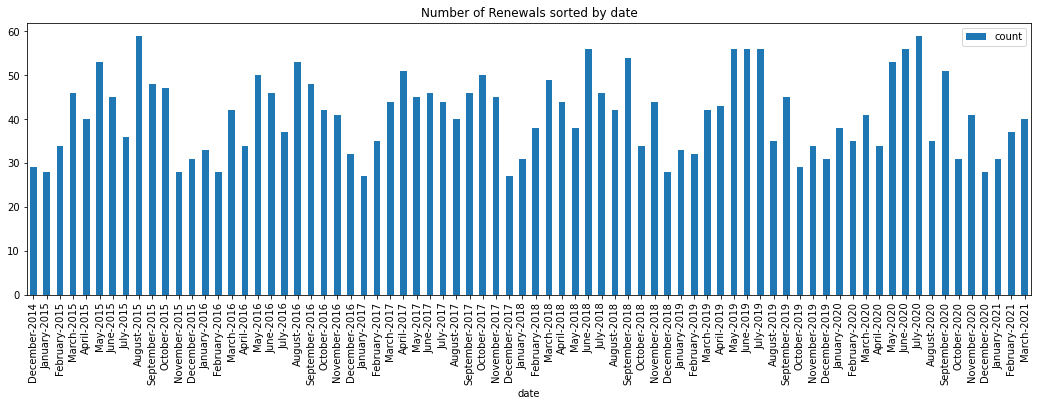

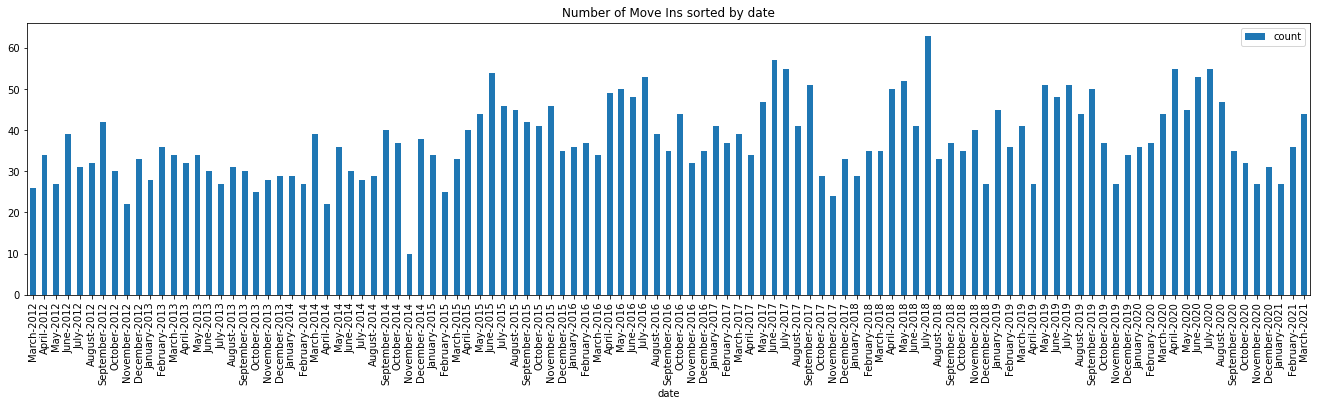

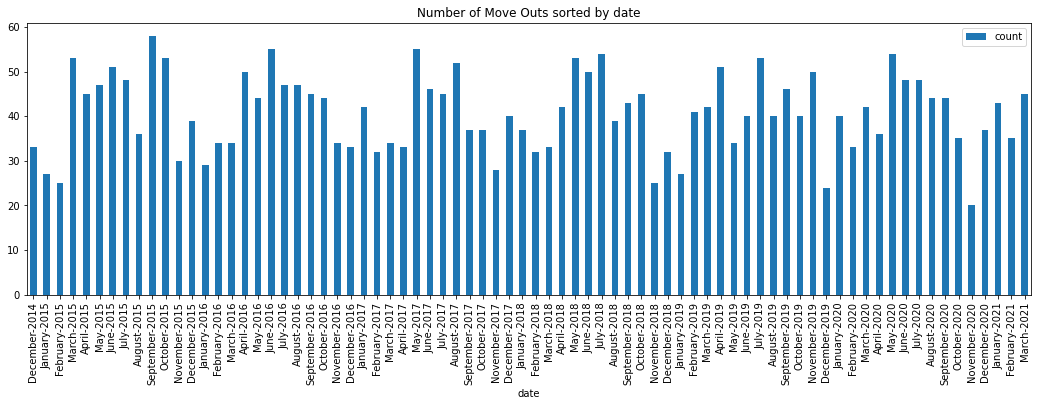

In [41]:
#
# Plots Renewal, Move In and Move Out counts in each months.
#

import matplotlib.pyplot as plt

#YAVASLAMASIN DIYE

Renewal.plot.bar(x="date", y="count", 
                  figsize=(18, 5), title="Number of Renewals sorted by date");


MoveIn.plot.bar(x="date", y="count", 
                  figsize=(23, 5), title="Number of Move Ins sorted by date");

MoveOut.plot.bar(x="date", y="count", 
                  figsize=(18, 5), title="Number of Move Outs sorted by date");


In [42]:
#
#
# VISUALISATION OF YEARLY RENEWALS, MOVE INS AND MOVE OUTS.
#
#

years:  ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
renewal:  [0, 0, 29, 495, 486, 500, 504, 492, 502, 108]
movein:  [316, 364, 365, 485, 492, 488, 477, 491, 497, 107]
moveout:  [0, 0, 33, 512, 496, 481, 485, 488, 481, 123]


Text(0, 0.5, 'count')

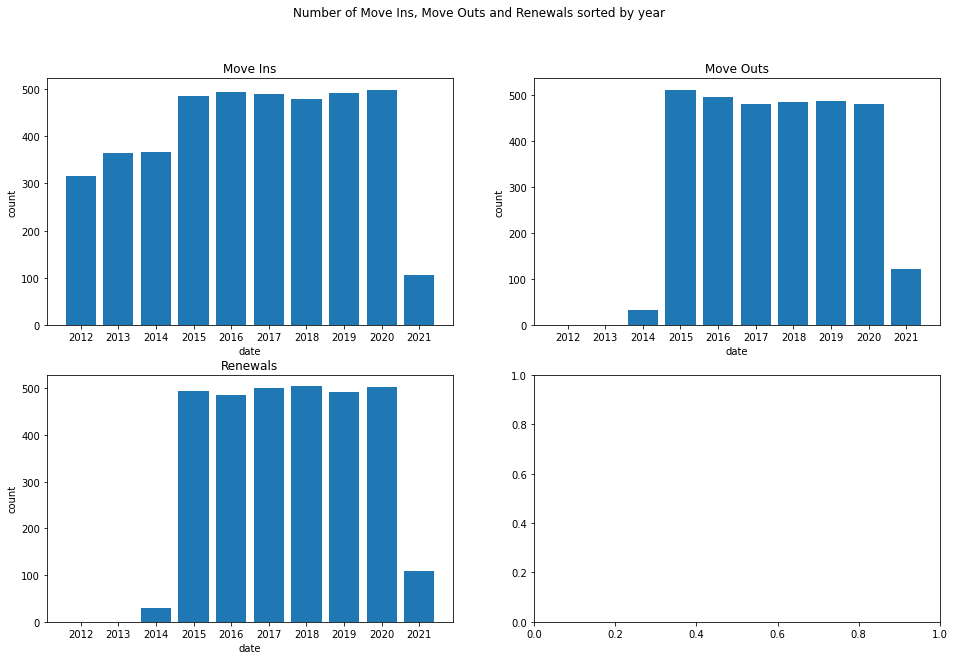

In [43]:
#
# Calculates Renewal, Move in and Move out counts in each year and store them in arrays.
# Visualises the results in subplots.
#

a=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
rb=[0]*10
rn=0
print("years: ",a)
for j in range(len(a)):
    for i in range(len(Renewal['date'])):
        if Renewal['date'][i][-4:]==a[j]:
            rn = rn+Renewal['count'][i]
        rb[j]=rn
    rn=0
print("renewal: ",rb)




ib=[0]*10
iin=0
for j in range(len(a)):
    for i in range(len(MoveIn['date'])):
        if MoveIn['date'][i][-4:]==a[j]:
            iin = iin+MoveIn['count'][i]
        ib[j]=iin
    iin=0
print("movein: ",ib)




ob=[0]*10
on=0
for j in range(len(a)):
    for i in range(len(MoveOut['date'])):
        if MoveOut['date'][i][-4:]==a[j]:
            on = on+MoveOut['count'][i]
        ob[j]=on
    on=0
print("moveout: ",ob)


#YAVASLAMASIN DIYE
fig, axs = plt.subplots(2,2,figsize=(16,10))
fig.suptitle('Number of Move Ins, Move Outs and Renewals sorted by year')

axs[0, 0].bar(a, ib)
axs[0, 0].set_title("Move Ins")
axs[0, 0].set_xlabel("date")
axs[0, 0].set_ylabel("count")

axs[0, 1].bar(a, ob)
axs[0, 1].set_title("Move Outs")
axs[0, 1].set_xlabel("date")
axs[0, 1].set_ylabel("count")

axs[1, 0].bar(a, rb)
axs[1, 0].set_title("Renewals")
axs[1, 0].set_xlabel("date")
axs[1, 0].set_ylabel("count")

In [44]:
dfcopy 

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0
...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0


In [45]:
#
#
# CALCULATION AND VISUALISATION OF MONTHLY OCCUPANCIES AT THE SITE AND UNIT LEVEL.
#
#

In [46]:
#
# Creates an array to hold all the months between 2012-03 to 2020-4 as in our dataset.
#

from datetime import datetime

myDic = { }
allMonths=np.arange(np.datetime64("2012-03"), np.datetime64("2021-04"), 
          np.timedelta64(1, 'M'), dtype='datetime64[M]')

zero=0
for i in allMonths:
    myDic[i] = zero
    zero=zero+1
    

In [47]:
#
# Creates arrays for STD, BR1 and BR2 Unit types.
#

std=[0]*len(allMonths)
br1=[0]*len(allMonths)
br2=[0]*len(allMonths)

In [48]:
#
# Calculates monthy occupancy status of STD, BR1 and BR2 Unit types and stores occupied Unit type counts for 
# each month in their arrays. (IF EndDate is not null..)
#

for j in range(len(dfcopy['StartDate'])): #j = 0.....7236
    if pd.isnull(dfcopy['EndDate'][j]) != True:
        for i in np.arange(dfcopy['StartDate'][j], dfcopy['EndDate'][j], np.timedelta64(1, 'M'),dtype='datetime64[M]'): # i = 2013-02 , 2013-03 , .... , 2015-01
            if dfcopy['UnitType'][j] == 'STD':
                std[myDic[i]]=std[myDic[i]]+1 # std[50]=std[50]+1 , std[51]=std[51]+1 , std[52]=std[52]+1
            elif dfcopy['UnitType'][j] == '1BR':
                br1[myDic[i]]=br1[myDic[i]]+1
            elif dfcopy['UnitType'][j] == '2BR':
                br2[myDic[i]]=br1[myDic[i]]+1
    else:
        for i in np.arange(dfcopy['StartDate'][j], pd.Timestamp('2021-04-01'), np.timedelta64(1, 'M'),dtype='datetime64[M]'): # i = 2013-02 , 2013-03 , .... , 2015-01
            if dfcopy['UnitType'][j] == 'STD':
                std[myDic[i]]=std[myDic[i]]+1 # std[50]=std[50]+1 , std[51]=std[51]+1 , std[52]=std[52]+1
            elif dfcopy['UnitType'][j] == '1BR':
                br1[myDic[i]]=br1[myDic[i]]+1
            elif dfcopy['UnitType'][j] == '2BR':
                br2[myDic[i]]=br1[myDic[i]]+1


In [49]:
print(std)

[14, 35, 53, 73, 89, 111, 137, 158, 169, 183, 201, 219, 234, 249, 270, 289, 306, 317, 331, 346, 363, 382, 397, 410, 425, 435, 459, 472, 490, 502, 519, 544, 551, 558, 562, 567, 560, 558, 552, 549, 544, 548, 544, 532, 540, 534, 536, 533, 536, 540, 541, 537, 538, 541, 536, 532, 530, 532, 533, 534, 537, 535, 532, 547, 554, 549, 545, 539, 541, 536, 530, 531, 535, 542, 535, 528, 539, 534, 538, 532, 543, 539, 546, 546, 543, 531, 544, 546, 539, 532, 532, 533, 515, 529, 527, 527, 530, 546, 538, 542, 549, 558, 553, 551, 554, 554, 544, 541, 540]


In [50]:
print(br1)#YAVASLAMASIN DIYE

[10, 18, 25, 41, 55, 63, 75, 82, 90, 108, 117, 131, 148, 162, 174, 182, 188, 204, 219, 226, 232, 239, 250, 262, 280, 287, 296, 310, 318, 333, 348, 359, 362, 359, 360, 361, 351, 350, 354, 353, 355, 357, 349, 352, 360, 362, 368, 370, 368, 368, 367, 368, 376, 370, 365, 371, 372, 368, 364, 361, 362, 367, 366, 365, 365, 358, 371, 367, 364, 367, 363, 365, 362, 362, 360, 359, 357, 358, 353, 350, 355, 355, 362, 359, 358, 346, 357, 359, 362, 369, 377, 376, 368, 364, 363, 372, 372, 374, 369, 365, 364, 361, 358, 359, 363, 356, 355, 354, 353]


In [51]:
print(br2)#YAVASLAMASIN DIYE

[11, 19, 26, 42, 56, 64, 76, 83, 91, 109, 118, 132, 149, 163, 175, 183, 189, 205, 220, 227, 233, 240, 251, 263, 281, 288, 297, 311, 319, 334, 349, 360, 363, 358, 356, 352, 340, 351, 355, 353, 354, 356, 345, 348, 356, 358, 362, 363, 361, 361, 360, 359, 367, 360, 357, 361, 361, 357, 356, 354, 355, 360, 359, 359, 358, 351, 364, 360, 358, 361, 358, 358, 354, 354, 352, 351, 351, 352, 347, 344, 348, 348, 355, 354, 352, 340, 350, 353, 354, 360, 368, 368, 361, 357, 355, 363, 365, 367, 361, 356, 357, 352, 349, 351, 355, 348, 347, 346, 345]


In [52]:
print(allMonths)#YAVASLAMASIN DIYE

['2012-03' '2012-04' '2012-05' '2012-06' '2012-07' '2012-08' '2012-09'
 '2012-10' '2012-11' '2012-12' '2013-01' '2013-02' '2013-03' '2013-04'
 '2013-05' '2013-06' '2013-07' '2013-08' '2013-09' '2013-10' '2013-11'
 '2013-12' '2014-01' '2014-02' '2014-03' '2014-04' '2014-05' '2014-06'
 '2014-07' '2014-08' '2014-09' '2014-10' '2014-11' '2014-12' '2015-01'
 '2015-02' '2015-03' '2015-04' '2015-05' '2015-06' '2015-07' '2015-08'
 '2015-09' '2015-10' '2015-11' '2015-12' '2016-01' '2016-02' '2016-03'
 '2016-04' '2016-05' '2016-06' '2016-07' '2016-08' '2016-09' '2016-10'
 '2016-11' '2016-12' '2017-01' '2017-02' '2017-03' '2017-04' '2017-05'
 '2017-06' '2017-07' '2017-08' '2017-09' '2017-10' '2017-11' '2017-12'
 '2018-01' '2018-02' '2018-03' '2018-04' '2018-05' '2018-06' '2018-07'
 '2018-08' '2018-09' '2018-10' '2018-11' '2018-12' '2019-01' '2019-02'
 '2019-03' '2019-04' '2019-05' '2019-06' '2019-07' '2019-08' '2019-09'
 '2019-10' '2019-11' '2019-12' '2020-01' '2020-02' '2020-03' '2020-04'
 '2020

In [53]:
#
# Creates new dataframe to keep STD, BR1, BR2 and Total(Site) occupancy counts for each month.
#

d = {'allMonths': allMonths, 'STD': std, '1BR': br1, '2BR': br2}
df = pd.DataFrame(data=d)
df['Total'] = df['STD']+df['1BR']+df['2BR']

In [54]:
#
# Keeps only month and years of dates for better visualisation.
#

df['allMonths'] = pd.to_datetime(pd.Series(df['allMonths'])).apply(lambda x: x.strftime('%B-%Y'))
df['allMonths']

0         March-2012
1         April-2012
2           May-2012
3          June-2012
4          July-2012
           ...      
104    November-2020
105    December-2020
106     January-2021
107    February-2021
108       March-2021
Name: allMonths, Length: 109, dtype: object

In [55]:
df

,allMonths,STD,1BR,2BR,Total
0,March-2012,14,10,11,35
1,April-2012,35,18,19,72
2,May-2012,53,25,26,104
3,June-2012,73,41,42,156
4,July-2012,89,55,56,200
...,...,...,...,...,...
104,November-2020,554,363,355,1272
105,December-2020,554,356,348,1258
106,January-2021,544,355,347,1246
107,February-2021,541,354,346,1241


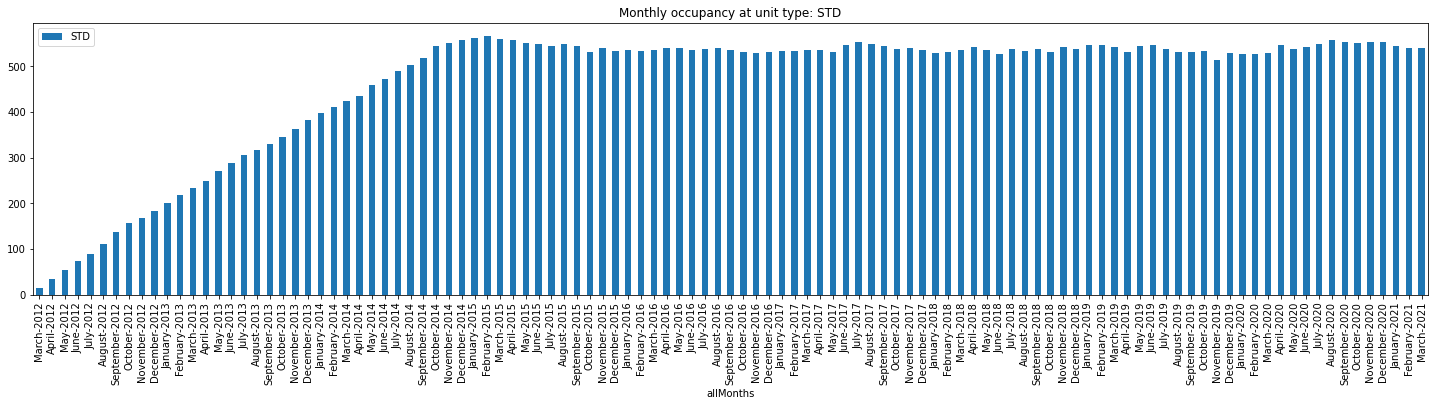

In [56]:
df.plot.bar(x="allMonths", y="STD", figsize=(25, 5), title="Monthly occupancy at unit type: STD");

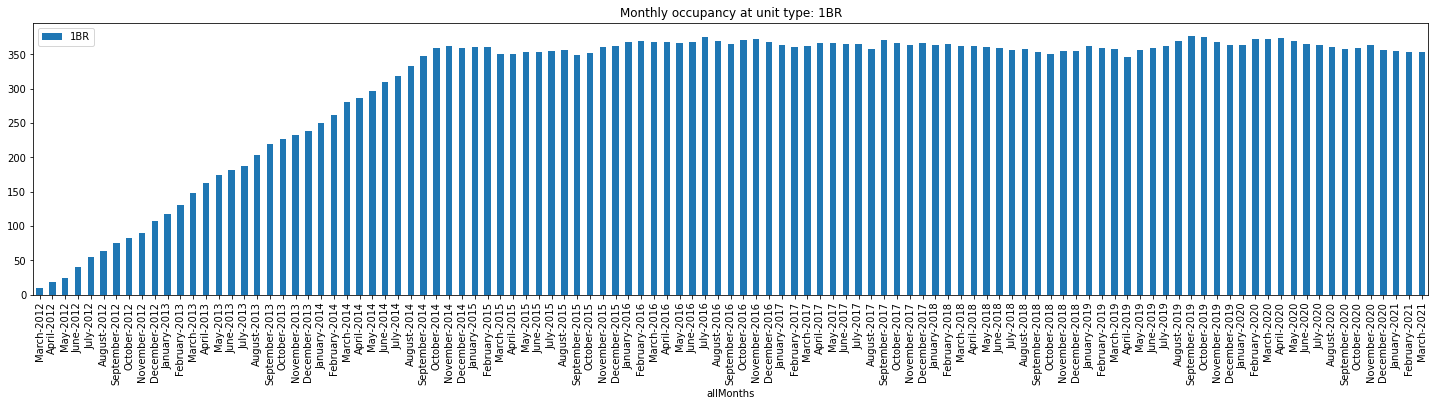

In [57]:
df.plot.bar(x="allMonths", y="1BR", figsize=(25, 5), title="Monthly occupancy at unit type: 1BR");

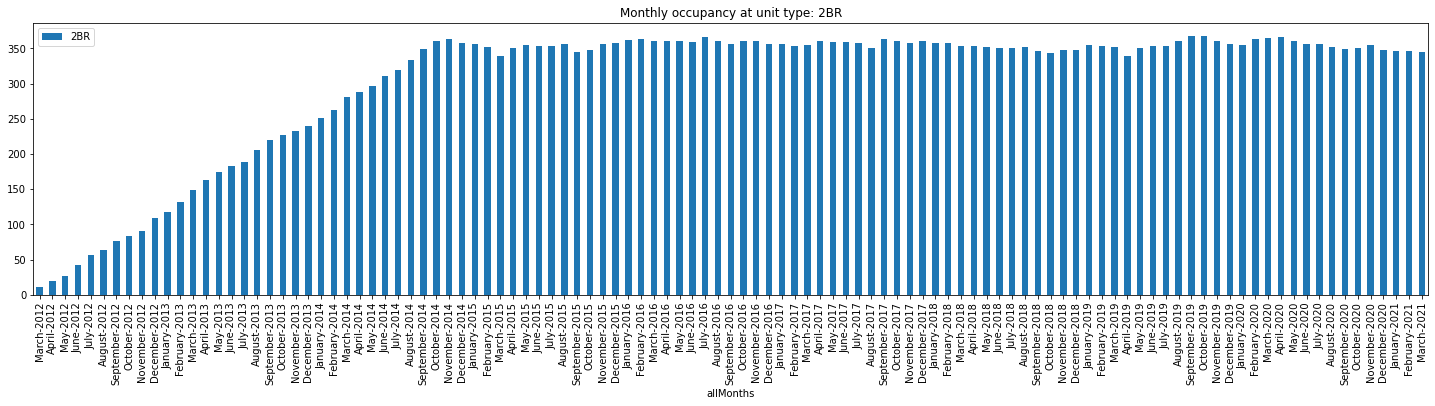

In [58]:
df.plot.bar(x="allMonths", y="2BR", figsize=(25, 5), title="Monthly occupancy at unit type: 2BR");

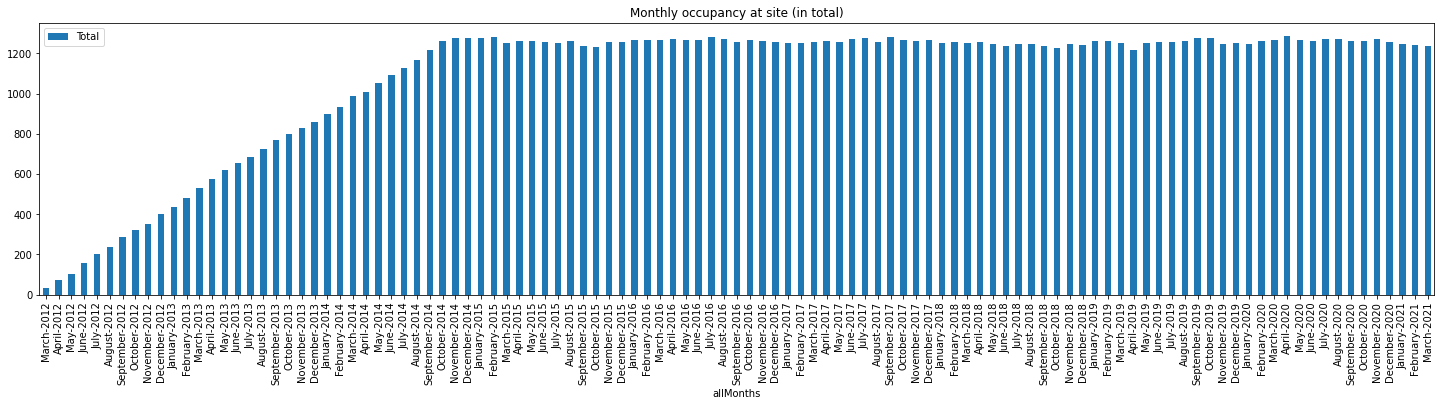

In [59]:
df.plot.bar(x="allMonths", y="Total", figsize=(25, 5), title="Monthly occupancy at site (in total)");

In [60]:
#
#
# PREPERATION FOR THE CHURN MODEL
#
#

In [61]:
Rental_Unit_Master

,LeaseNo,CustomerNo,UnitNumber,StartDate,EndDate,UnitType,UnitPlan,Sqft,Floor,Total Occupancy,StartMonthYear,RentRate,EndMonthYear,EndRentRate,%ChangeInRent,Churn,MoveIn,MoveOut,Renewal
0,12435,3435,10201,2013-02-11,2015-02-11,STD,STD-S&A,450,2,24.0,STD-S&A02-2013,NaN,STD-S&A02-2015,1500.0,NaN,NO,February-2013,NaN,February-2015
1,13573,3435,10201,2015-02-12,2016-02-13,STD,STD-S&A,450,2,12.0,STD-S&A02-2015,1500.0,STD-S&A02-2016,1396.0,-6.933333,YES,NaN,February-2016,NaN
2,14688,6456,10201,2016-03-01,2017-03-01,STD,STD-S&A,450,2,12.0,STD-S&A03-2016,1395.0,STD-S&A03-2017,1420.0,1.792115,YES,March-2016,March-2017,NaN
3,15776,8282,10201,2017-04-01,2018-04-01,STD,STD-S&A,450,2,12.0,STD-S&A04-2017,1439.0,STD-S&A04-2018,1453.0,0.972898,NO,April-2017,NaN,April-2018
4,16736,8282,10201,2018-04-02,2019-04-03,STD,STD-S&A,450,2,12.0,STD-S&A04-2018,1453.0,STD-S&A04-2019,1500.0,3.234687,YES,NaN,April-2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,18869,13562,91008,2020-05-01,NaT,1BR,1BR-S&B,750,10,NaN,1BR-S&B05-2020,2124.0,1BR-S&B,NaN,NaN,NaN,May-2020,NaN,NaN
7232,15080,7189,100208,2016-07-01,2017-07-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B07-2016,1979.0,1BR-S&B07-2017,1974.0,-0.252653,YES,July-2016,July-2017,NaN
7233,16603,9724,100208,2018-02-01,2019-02-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B02-2018,1923.0,1BR-S&B02-2019,1937.0,0.728029,YES,February-2018,February-2019,NaN
7234,17690,11563,100208,2019-03-02,2020-03-01,1BR,1BR-S&B,750,2,12.0,1BR-S&B03-2019,1923.0,1BR-S&B03-2020,2071.0,7.696308,YES,March-2019,March-2020,NaN


In [62]:
Rental_Unit_Master.info()
#Rental_Unit_Master.to_csv('new-data.csv', na_rep='(missing)')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7236 entries, 0 to 7235
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   LeaseNo          7236 non-null   int64         
 1   CustomerNo       7236 non-null   int64         
 2   UnitNumber       7236 non-null   int64         
 3   StartDate        7236 non-null   datetime64[ns]
 4   EndDate          6253 non-null   datetime64[ns]
 5   UnitType         7236 non-null   object        
 6   UnitPlan         7236 non-null   object        
 7   Sqft             7236 non-null   int64         
 8   Floor            7236 non-null   int64         
 9   Total Occupancy  6253 non-null   float64       
 10  StartMonthYear   7236 non-null   object        
 11  RentRate         6229 non-null   float64       
 12  EndMonthYear     7236 non-null   object        
 13  EndRentRate      6253 non-null   float64       
 14  %ChangeInRent    5246 non-null   float64

In [63]:
#
# Takes only meaningful columns to deploy our churn model. Drops other columns which has no significant 
# effect customer's churn decision.
#

dataset = Rental_Unit_Master.drop(['LeaseNo', 'CustomerNo', 'UnitNumber','EndDate','UnitType',
                              'Floor','StartMonthYear','EndMonthYear','MoveIn',
                              'MoveOut','Renewal','EndRentRate'], axis=1)

In [64]:
dataset

,StartDate,UnitPlan,Sqft,Total Occupancy,RentRate,%ChangeInRent,Churn
0,2013-02-11,STD-S&A,450,24.0,NaN,NaN,NO
1,2015-02-12,STD-S&A,450,12.0,1500.0,-6.933333,YES
2,2016-03-01,STD-S&A,450,12.0,1395.0,1.792115,YES
3,2017-04-01,STD-S&A,450,12.0,1439.0,0.972898,NO
4,2018-04-02,STD-S&A,450,12.0,1453.0,3.234687,YES
...,...,...,...,...,...,...,...
7231,2020-05-01,1BR-S&B,750,NaN,2124.0,NaN,NaN
7232,2016-07-01,1BR-S&B,750,12.0,1979.0,-0.252653,YES
7233,2018-02-01,1BR-S&B,750,12.0,1923.0,0.728029,YES
7234,2019-03-02,1BR-S&B,750,12.0,1923.0,7.696308,YES


In [65]:
#
# Gets only month values from Start date and renames it as Date because only the month has significant
# effect in terms of moving in or out.
# Drops rows wit NaN in 'Churn','%ChangeInRent','Total Occupancy' columns as they cannot replaceable and
# ML models cannot work with null values.
#

dataset['StartDate']=dataset['StartDate'].dt.strftime('%B')
dataset['StartDate']=dataset['StartDate'].astype(str)
dataset=dataset.rename(columns={"StartDate": "Date"})
dataset=dataset.dropna(subset=['Churn','%ChangeInRent','Total Occupancy'])
dataset

,Date,UnitPlan,Sqft,Total Occupancy,RentRate,%ChangeInRent,Churn
1,February,STD-S&A,450,12.0,1500.0,-6.933333,YES
2,March,STD-S&A,450,12.0,1395.0,1.792115,YES
3,April,STD-S&A,450,12.0,1439.0,0.972898,NO
4,April,STD-S&A,450,12.0,1453.0,3.234687,YES
5,May,STD-S&A,450,12.0,1463.0,5.604921,YES
...,...,...,...,...,...,...,...
7229,February,1BR-S&B,750,12.0,1923.0,0.728029,YES
7230,March,1BR-S&B,750,12.0,1923.0,7.696308,YES
7232,July,1BR-S&B,750,12.0,1979.0,-0.252653,YES
7233,February,1BR-S&B,750,12.0,1923.0,0.728029,YES


In [66]:
dataset['Total Occupancy'].sort_values(ascending=False) 

1       12.0
4887    12.0
4912    12.0
4911    12.0
4910    12.0
        ... 
1793     0.0
1213     0.0
978      0.0
3472     0.0
1555     0.0
Name: Total Occupancy, Length: 5246, dtype: float64

In [67]:
#
# After dropping rows with NaN values in Total Occupancy I figured out that there is no meaningful data
# left in Total Occupancy column. There is only 12 months length leases in the column. So
# all column values are the same (assuming 0.0 values are written by mistake). I dropped this column too.
#

dataset=dataset.drop(columns=['Total Occupancy']) 

In [68]:
#
# Classification algorithms work best with numerical variables. So that I used get_dummies method of pandas
# to convert each group of variables (such as January, February... for Date) into 1s and 0s indicates the
# existance of each variable.
#

Date = pd.get_dummies(dataset.Date).iloc[:,1:]
UnitPlan = pd.get_dummies(dataset.UnitPlan).iloc[:,1:]
Churn = pd.get_dummies(dataset.Churn).iloc[:,1:]

In [69]:
#
# Drops these three columns as we will concatenate their dummy tables.
#

dataset =  dataset.drop(['Date', 'UnitPlan','Churn'], axis=1)

In [70]:
Date

,August,December,February,January,July,June,March,May,November,October,September
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7229,0,0,1,0,0,0,0,0,0,0,0
7230,0,0,0,0,0,0,1,0,0,0,0
7232,0,0,0,0,1,0,0,0,0,0,0
7233,0,0,1,0,0,0,0,0,0,0,0


In [71]:
UnitPlan

,1BR-L&B,1BR-S&A,1BR-S&B,2BR-S,STD-L,STD-M&A,STD-M&B,STD-S&A,STD-S&B,STD-S&C
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7229,0,0,1,0,0,0,0,0,0,0
7230,0,0,1,0,0,0,0,0,0,0
7232,0,0,1,0,0,0,0,0,0,0
7233,0,0,1,0,0,0,0,0,0,0


In [72]:
Churn

,YES
1,1
2,1
3,0
4,1
5,1
...,...
7229,1
7230,1
7232,1
7233,1


In [73]:
#
# Concatenate dummy tables with our original dataset.
#

dataset = pd.concat([dataset,Date,UnitPlan,Churn], axis=1) 

In [74]:
dataset

,Sqft,RentRate,%ChangeInRent,August,December,February,January,July,June,March,...,1BR-S&A,1BR-S&B,2BR-S,STD-L,STD-M&A,STD-M&B,STD-S&A,STD-S&B,STD-S&C,YES
1,450,1500.0,-6.933333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,450,1395.0,1.792115,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,450,1439.0,0.972898,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,450,1453.0,3.234687,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,450,1463.0,5.604921,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,750,1923.0,0.728029,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7230,750,1923.0,7.696308,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7232,750,1979.0,-0.252653,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
7233,750,1923.0,0.728029,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [75]:
dataset=dataset.rename(columns={"YES": "Churn"}) # renames Churn column.

In [76]:
#
#
# CHURN ALGORITHM DEPLOYMENT
#
#

In [77]:
#
# Devide our dataset into 'data'(X) and 'target'(y)
#

X =  dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

In [78]:
y # 1s = churn, 0s = not churn.

1       1
2       1
3       0
4       1
5       1
       ..
7229    1
7230    1
7232    1
7233    1
7234    1
Name: Churn, Length: 5246, dtype: uint8

In [79]:
from sklearn.model_selection import train_test_split 

In [80]:
#
#
# VOTING CLASSIFIERS
#
#

In [81]:
#
# Splits data into a training set and a test set 
#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
#
# Import 4 Classification algorithms.
#

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [83]:
#
# Assign n_estimators and train classification algorithms with training sets.
#

random_forest_clf = RandomForestClassifier(n_estimators=300, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=300, random_state=42)
svm_clf = LinearSVC(max_iter=50, tol=300, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(n_estimators=300, random_state=42)
Training the ExtraTreesClassifier(n_estimators=300, random_state=42)
Training the LinearSVC(max_iter=50, random_state=42, tol=300)
Training the MLPClassifier(random_state=42)


In [84]:
#
# Scores of each estimator (algorithm) using validation sets.
# Scores are very low.
#

[estimator.score(X_test, y_test) for estimator in estimators]

[0.5095238095238095, 0.5, 0.5104761904761905, 0.4895238095238095]

In [85]:
from sklearn.ensemble import VotingClassifier

In [86]:
#
# Renames estimators.
#

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [87]:
voting_clf = VotingClassifier(named_estimators) # our voting classifier.

In [88]:
voting_clf.fit(X_train, y_train) # Training classifier.

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=300,
                                                   random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=50, random_state=42, tol=300)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [89]:
voting_clf.score(X_test, y_test) # Voting classifier's accuracy result.

0.5

In [90]:
#
# Accuracy scores of each estimator's voting classifier
#

[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_] 

[0.5095238095238095, 0.5, 0.5104761904761905, 0.4895238095238095]

In [91]:
#
# MLPClassifier classifier's results are too low so I want to remove it.
#

voting_clf.set_params(extra_trees_clf=None) 

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('extra_trees_clf', None),
                             ('svm_clf',
                              LinearSVC(max_iter=50, random_state=42, tol=300)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [92]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(n_estimators=300, random_state=42)),
 ('extra_trees_clf', None),
 ('svm_clf', LinearSVC(max_iter=50, random_state=42, tol=300)),
 ('mlp_clf', MLPClassifier(random_state=42))]

In [93]:
voting_clf.estimators_

[RandomForestClassifier(n_estimators=300, random_state=42),
 ExtraTreesClassifier(n_estimators=300, random_state=42),
 LinearSVC(max_iter=50, random_state=42, tol=300),
 MLPClassifier(random_state=42)]

In [94]:
#
# Lets remove the lowest scored estimator for better voting result.
#

del voting_clf.estimators_[3]

In [95]:
#
# Hard voting as we have SVM. Calculating Voting classification scores.
#

voting_clf.voting = "hard" 
voting_clf.score(X_test, y_test)

0.5095238095238095

In [96]:
#
# Estimator scores of each algorithm in voting classification
#

[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.5095238095238095, 0.5, 0.5104761904761905]

In [97]:
#
#
# RANDOM FOREST
#
#

In [98]:
# 
# During voting the best scored algorithm was Random Forest. Lets try to optimize the algorithm with adding 
# parameters.
# Import random forest classifier and split dataset.
#

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = RandomForestClassifier(n_estimators=500, random_state=0, 
                                    n_jobs=-1, max_depth=5) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [99]:
#
# Calculates confusion matrix, accuracy score, precision, recall, f1-socre and support values.
#

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(confusion_matrix(y_test,predictions )) 
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

[[322 192]
 [318 218]]
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       514
           1       0.53      0.41      0.46       536

    accuracy                           0.51      1050
   macro avg       0.52      0.52      0.51      1050
weighted avg       0.52      0.51      0.51      1050

0.5142857142857142


In [100]:
#
# MODELS UNDERFIT !! 
# WHY ACCURACY SCORES ARE TOO LOW? 
# LETS SEE THE FINDINGS.
#

In [101]:
#
# Almost half of customer churned.
#

Rental_Unit_Master.groupby(['Churn'])['Churn'].agg('count')

Churn
NO     3116
YES    3137
Name: Churn, dtype: int64

In [102]:
#
# Count of each UnitPlan in dataset.
#

Rental_Unit_Master.groupby(['UnitPlan'])['UnitPlan'].agg('count')

UnitPlan
1BR-L&A    663
1BR-L&B    653
1BR-S&A    669
1BR-S&B    669
2BR-S      644
STD-L      654
STD-M&A    636
STD-M&B    662
STD-S&A    672
STD-S&B    647
STD-S&C    667
Name: UnitPlan, dtype: int64

In [103]:
Churn = pd.get_dummies(Rental_Unit_Master.Churn).iloc[:,1:]
Rental_Unit_Master =  Rental_Unit_Master.drop(['Churn'], axis=1)
Rental_Unit_Master = pd.concat([Rental_Unit_Master,Churn], axis=1)


In [104]:
Rental_Unit_Master=Rental_Unit_Master.rename(columns={"YES": "Churn"})

In [105]:
#
# Churn totals of customers in each UnitPlan. Churn rates are too similar so churn cannot be related 
# with only UnitPlan's itself.
#

Rental_Unit_Master.groupby(['UnitPlan'])['Churn'].agg('sum')

UnitPlan
1BR-L&A    300.0
1BR-L&B    281.0
1BR-S&A    289.0
1BR-S&B    264.0
2BR-S      300.0
STD-L      278.0
STD-M&A    281.0
STD-M&B    300.0
STD-S&A    294.0
STD-S&B    273.0
STD-S&C    277.0
Name: Churn, dtype: float64

In [106]:
Rental_Unit_Master['EndDate']=Rental_Unit_Master['EndDate'].dt.strftime('%B')

In [107]:
#
# Count of each months in dataset.
#

Rental_Unit_Master.groupby(['EndDate'])['EndDate'].agg('count')

EndDate
April        504
August       527
December     445
February     473
January      468
July         575
June         599
March        597
May          587
November     420
October      490
September    568
Name: EndDate, dtype: int64

In [108]:
#
# Churn totals of customers in each month. The total churn are again too similar so churn cannot be related 
# with only Month variable's itself.
#

Rental_Unit_Master.groupby(['EndDate'])['Churn'].agg('sum')

EndDate
April        258.0
August       263.0
December     239.0
February     234.0
January      247.0
July         297.0
June         294.0
March        293.0
May          292.0
November     187.0
October      257.0
September    276.0
Name: Churn, dtype: float64

In [109]:
dfcopy2['StartDate']=dfcopy2['StartDate'].dt.strftime('%m')
dfcopy2['StartDate']=dfcopy2['StartDate'].astype(int)
dfcopy2=dfcopy2.rename(columns={"StartDate": "Date"})

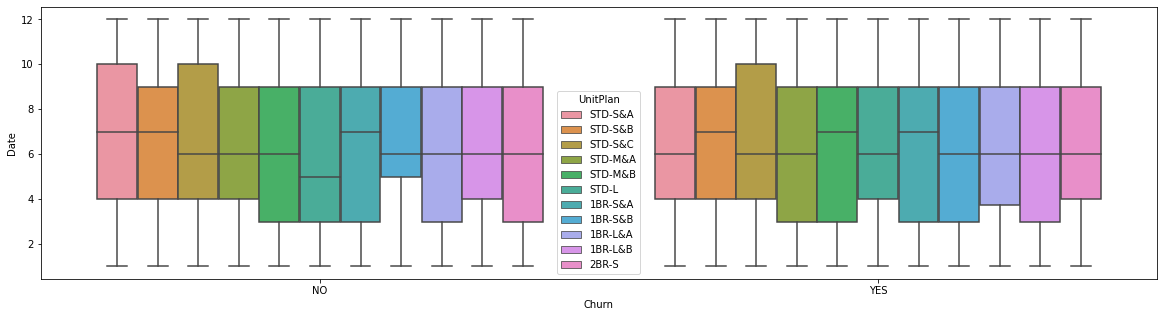

In [110]:
#
# Creates a box plot to see similarities between churned and not churned customers in each UnitPlan
# and each month.
#
import seaborn as sns
#YAVASLAMASIN DIYE
plt.figure(figsize=(20, 5))
sns.boxplot(x = 'Churn',
            y = 'Date',
            data = dfcopy2,
            sym = "",                  
            hue = "UnitPlan") 

plt.show()

In [ ]:
### denemeler


In [ ]:
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()